In [2]:
#importing libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency as chi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as  mse
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plot
%matplotlib inline

In [3]:
#loading the dataset
file = pd.read_csv('churn_prediction.csv')
file.head(20)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [4]:
#no.of rows and col.
file.shape

(28382, 21)

In [5]:
file.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


In [6]:
file.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [7]:
file.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [8]:
file.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [9]:
#imputing missing values
file['gender'].fillna(value = file['gender'].mode()[0], inplace=True)
file['dependents'].fillna(value = file['dependents'].median(), inplace = True)
file['occupation'].fillna(value = file['occupation'].mode()[0], inplace=True)
file['city'].fillna(value = file['city'].mean(), inplace = True)
file['days_since_last_transaction'].fillna(value = file['days_since_last_transaction'].mean(), inplace = True)

In [10]:
file.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [50]:
file.head(20)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.000000,2,27.477263,6.073178,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,796.109576,2,56.692151,3.914868,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.000000,2,6.403124,4.121242,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.000000,2,24.124676,5.277632,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.000000,3,19.697716,3.870877,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.000000,2,40.816663,3.914868,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.000000,1,1.000000,4.610436,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.000000,2,17.804494,5.561298,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.000000,2,64.109282,2.668402,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.000000,2,6.164414,0.000000,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [49]:
file['branch_code'].value_counts()

4.358899     145
2.449490     142
7.745967     128
4.000000     111
2.828427     109
            ... 
59.883220      1
53.404120      1
65.222695      1
47.759816      1
58.736701      1
Name: branch_code, Length: 3185, dtype: int64

# univariant analaysis

Text(0.5, 0, 'Age')

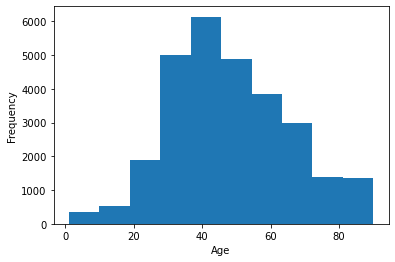

In [12]:
file['age'].plot.hist()
plot.xlabel('Age')

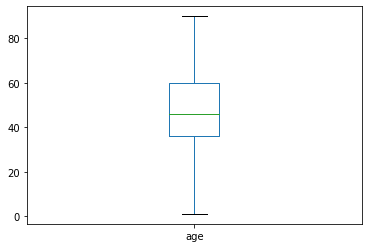

In [13]:
file['age'].plot.box()

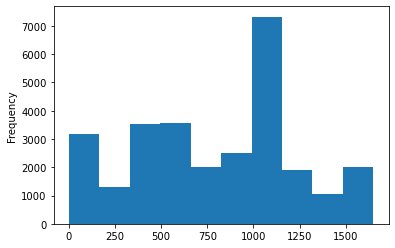

In [47]:
file['city'].plot.hist()

Text(0.5, 0, 'Gender')

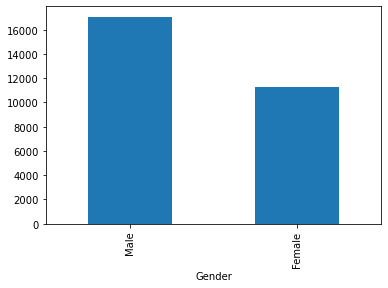

In [14]:
file['gender'].value_counts().plot.bar()
plot.xlabel('Gender')

Text(0.5, 0, 'Occupation')

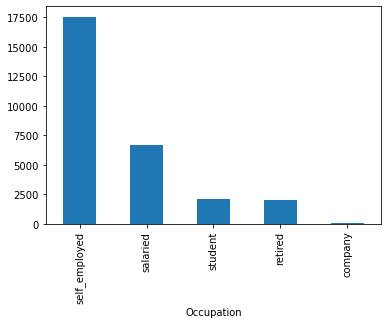

In [15]:
file['occupation'].value_counts().plot.bar()
plot.xlabel('Occupation')

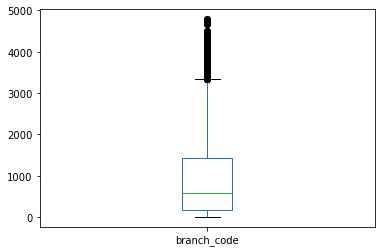

In [16]:
file['branch_code'].plot.box()

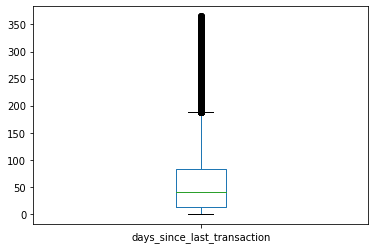

In [17]:
file['days_since_last_transaction'].plot.box()

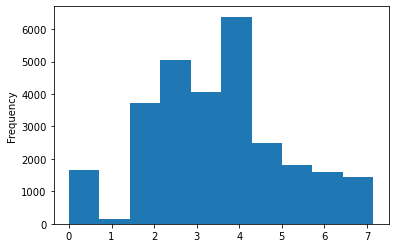

In [48]:
file['days_since_last_transaction'].plot.hist()

In [18]:
#transforming data
file['branch_code'] = np.power(file['branch_code'],1/2)
file['days_since_last_transaction'] = np.power(file['days_since_last_transaction'],1/3)

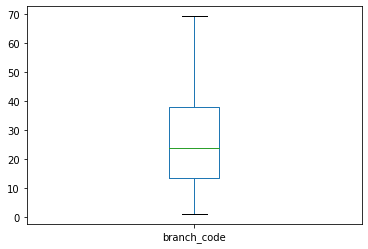

In [19]:
file['branch_code'].plot.box()

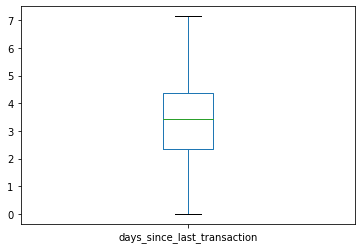

In [20]:
file['days_since_last_transaction'].plot.box()

In [21]:
file.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.000000,2,27.477263,6.073178,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,796.109576,2,56.692151,3.914868,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.000000,2,6.403124,4.121242,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.000000,2,24.124676,5.277632,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.000000,3,19.697716,3.870877,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.000000,2,40.816663,3.914868,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.000000,1,1.000000,4.610436,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.000000,2,17.804494,5.561298,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.000000,2,64.109282,2.668402,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.000000,2,6.164414,0.000000,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [22]:
temp = (file['churn'].value_counts()/len(file['churn']))*100
temp

0    81.467127
1    18.532873
Name: churn, dtype: float64

Text(0.5, 0, 'Target')

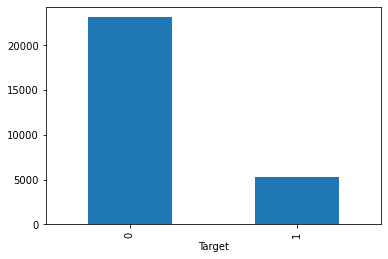

In [23]:
file['churn'].value_counts().plot.bar()
plot.xlabel('Target')

In [24]:
file.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                       float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [25]:
file.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.009110,0.000733,0.009618,-0.000100,0.011948,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.068588,0.043637,-0.167366,-0.415000,-0.101593,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,0.001261,0.015245,-0.076532,-0.068465,-0.019787,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.009110,0.068588,0.001261,1.000000,0.003678,0.007917,-0.001258,-0.097419,-0.003838,-0.002181,-0.001786,-0.001967,0.003542,0.025848,0.008225,0.030746,-0.002769,-0.001672,0.029335
city,0.000733,0.043637,0.015245,0.003678,1.000000,0.006534,-0.060050,-0.000952,-0.005646,-0.004084,-0.006289,-0.007880,0.004117,0.008073,0.001463,0.005965,-0.005789,-0.005831,-0.001561
customer_nw_category,0.009618,-0.167366,-0.076532,0.007917,0.006534,1.000000,0.267248,0.062391,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000100,-0.415000,-0.068465,-0.001258,-0.060050,0.267248,1.000000,0.045901,-0.002712,-0.002776,-0.000901,-0.000903,-0.018564,-0.028802,-0.022459,-0.020775,-0.001849,-0.000762,0.034722
days_since_last_transaction,0.011948,-0.101593,-0.019787,-0.097419,-0.000952,0.062391,0.045901,1.000000,-0.027935,-0.016624,-0.015628,-0.015329,-0.045373,-0.090536,-0.049595,-0.090677,-0.021377,-0.013552,-0.043298
current_balance,0.006589,0.002986,0.054346,-0.003838,-0.005646,-0.058314,-0.002712,-0.027935,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,-0.002181,-0.004084,-0.059854,-0.002776,-0.016624,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


In [26]:
file.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.000000,2,27.477263,6.073178,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,796.109576,2,56.692151,3.914868,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.000000,2,6.403124,4.121242,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.000000,2,24.124676,5.277632,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.000000,3,19.697716,3.870877,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.000000,2,40.816663,3.914868,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.000000,1,1.000000,4.610436,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.000000,2,17.804494,5.561298,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.000000,2,64.109282,2.668402,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.000000,2,6.164414,0.000000,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


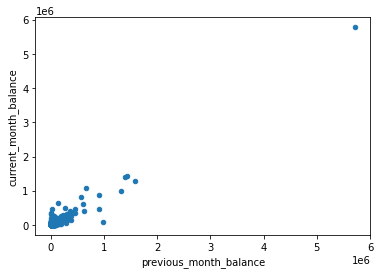

In [27]:
file.plot.scatter('previous_month_balance','current_month_balance')

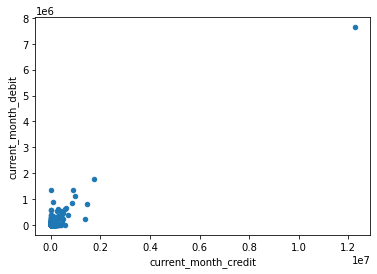

In [28]:
file.plot.scatter('current_month_credit','current_month_debit')

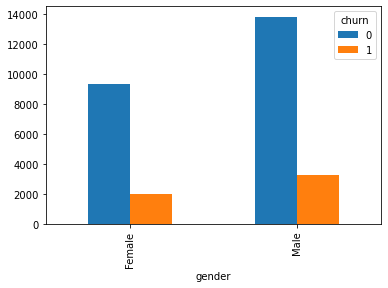

In [29]:
pd.crosstab(file['gender'],file['churn']).plot.bar()

In [30]:
chi(pd.crosstab(file['gender'],file['churn']))

(11.862741137017077,
 0.0005726818953372832,
 1,
 array([[ 9213.11739835,  2095.88260165],
        [13908.88260165,  3164.11739835]]))

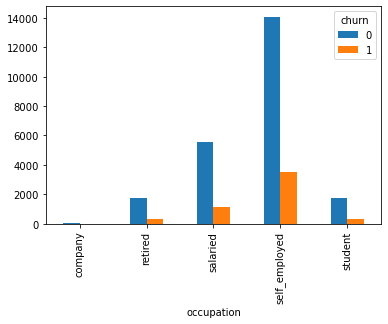

In [31]:
pd.crosstab(file['occupation'],file['churn']).plot.bar()

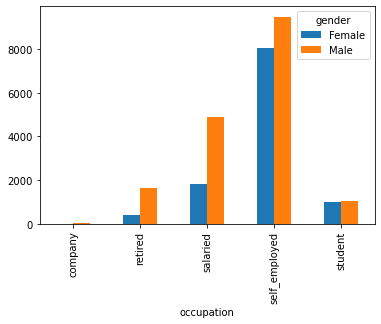

In [32]:
pd.crosstab(file['occupation'],file['gender']).plot.bar()

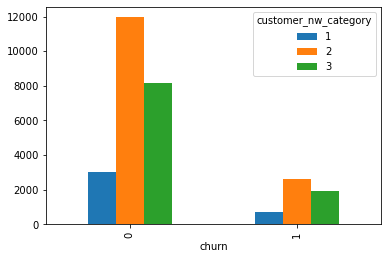

In [33]:
pd.crosstab(file['churn'],file['customer_nw_category']).plot.bar()

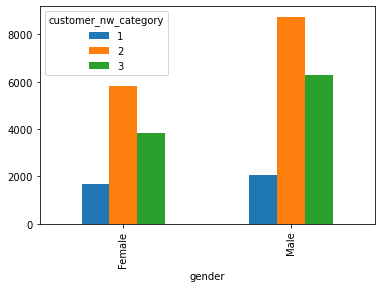

In [34]:
pd.crosstab(file['gender'],file['customer_nw_category']).plot.bar()

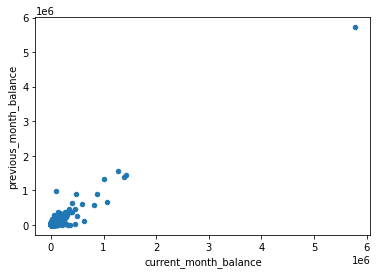

In [35]:
file.plot.scatter('current_month_balance','previous_month_balance')

In [36]:
file

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.000000,2,27.477263,6.073178,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,796.109576,2,56.692151,3.914868,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.000000,2,6.403124,4.121242,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0.0,self_employed,1020.000000,2,24.124676,5.277632,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.000000,3,19.697716,3.870877,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.000000,2,34.741906,4.121285,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.000000,2,14.933185,2.410142,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.000000,2,24.248711,0.000000,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.000000,3,16.552945,4.121242,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [37]:
x = file.drop('churn',axis=1)
y = file['churn']
y

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: int64

In [38]:
x = pd.get_dummies(x)

In [39]:
x

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,187.000000,2,27.477263,6.073178,1458.71,1458.71,...,0.20,1458.71,1458.71,0,1,0,0,0,1,0
1,2,310,35,0.0,796.109576,2,56.692151,3.914868,5390.37,8704.66,...,100.56,6496.78,8787.61,0,1,0,0,0,1,0
2,4,2356,31,0.0,146.000000,2,6.403124,4.121242,3913.16,5815.29,...,259.23,5006.28,5070.14,0,1,0,0,1,0,0
3,5,478,90,0.0,1020.000000,2,24.124676,5.277632,2291.91,2291.91,...,2143.33,2291.91,1669.79,0,1,0,0,0,1,0
4,6,2531,42,2.0,1494.000000,3,19.697716,3.870877,927.72,1401.72,...,1538.06,1157.15,1677.16,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0.0,1020.000000,2,34.741906,4.121285,1076.43,1076.43,...,0.30,1076.43,1076.43,1,0,0,0,0,0,1
28378,30298,4919,34,0.0,1046.000000,2,14.933185,2.410142,3844.10,4069.21,...,1014.07,3738.54,3690.32,1,0,0,0,0,1,0
28379,30299,297,47,0.0,1096.000000,2,24.248711,0.000000,65511.97,61017.55,...,71.80,61078.50,57564.24,0,1,0,0,1,0,0
28380,30300,2585,50,3.0,1219.000000,3,16.552945,4.121242,1625.55,1625.55,...,0.20,1625.55,1625.55,0,1,0,0,0,1,0


In [40]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,-1.731304,0.478644,0.999147,-0.330877,-1.427499e+00,-0.341489,0.082601,1.583326,-0.139017,-0.141953,...,-0.137427,-0.142564,-0.142265,-0.813874,0.813874,-0.037568,-0.277108,-0.556106,0.785274,-0.279606
1,-1.731190,-1.275909,-0.741756,-0.330877,-2.664346e-16,-0.341489,1.969968,0.270844,-0.046720,0.028425,...,-0.133297,-0.022705,0.030459,-0.813874,0.813874,-0.037568,-0.277108,-0.556106,0.785274,-0.279606
2,-1.730961,-0.005178,-0.966389,-0.330877,-1.523586e+00,-0.341489,-1.278850,0.396342,-0.081398,-0.039514,...,-0.126767,-0.058165,-0.057152,-0.813874,0.813874,-0.037568,-0.277108,1.798219,-1.273441,-0.279606
3,-1.730847,-1.171568,2.346943,-0.330877,5.247060e-01,-0.341489,-0.133986,1.099549,-0.119457,-0.122361,...,-0.049234,-0.122742,-0.137290,-0.813874,0.813874,-0.037568,-0.277108,-0.556106,0.785274,-0.279606
4,-1.730733,0.103512,-0.348649,1.756001,1.635565e+00,1.172672,-0.419980,0.244093,-0.151482,-0.143293,...,-0.074142,-0.149738,-0.137116,-0.813874,0.813874,-0.037568,-0.277108,-0.556106,0.785274,-0.279606


clf = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

def elbow(k):
    
    test_predict = []
    
    for i in k:
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(train_x,train_y)
        temp = clf.predict(test_x)
        score = f1_score(temp,test_y)
        error = 1-score
        test_predict.append(error)
        
    return test_predict

k = range(1,20,2)

test = elbow(k)

plot.plot(k, test)
plot.xlabel('K Neighbors')
plot.ylabel('f1_score')
plot.title('Elbow Curve for test')